In [1]:
import pandas as pd
data = pd.read_csv('wine_cleared.csv')
display(data.head(5))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
display('min points', data['points'].min())
display('min price', data['price'].min())

'min points'

80

'min price'

4.0

In [3]:
pip install statistics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import statistics

In [5]:
round(statistics.mean(data['price']), 2)

35.36

In [6]:
data['price'].sum()/data['price'].count()

35.363389129985535

In [7]:
statistics.median(data['price'])

28.0

In [8]:
count_price = len(data['price']) # количество записей цен
sorted_price = sorted(data['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

In [9]:
statistics.mode(data['price'])

35.363389129985535

In [10]:
counts = {}
max_count = 0
mode_value = None

for num in data['price']:
    if num not in counts:
        counts[num] = 1
    else:
        counts[num] += 1
    
    if counts[num] > max_count:
        max_count = counts[num]
        mode_value = num

print(f"Мода: {mode_value}")

Мода: 35.363389129985535


In [11]:
mode = round(data["price"].value_counts().index[0],2)
print(f"Мода: {mode}")

Мода: 35.36


In [12]:
data.corr(numeric_only=True)

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


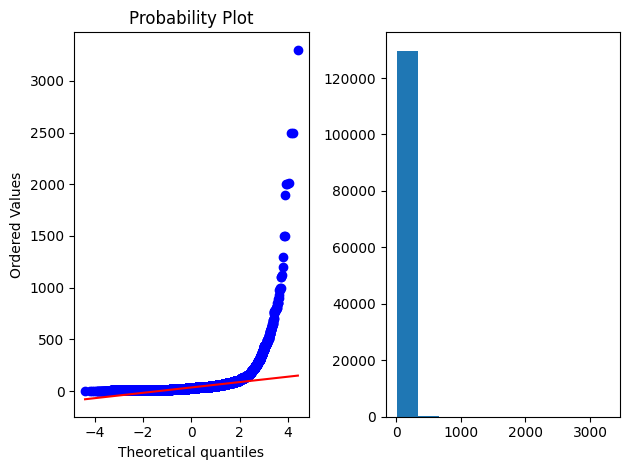

In [13]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

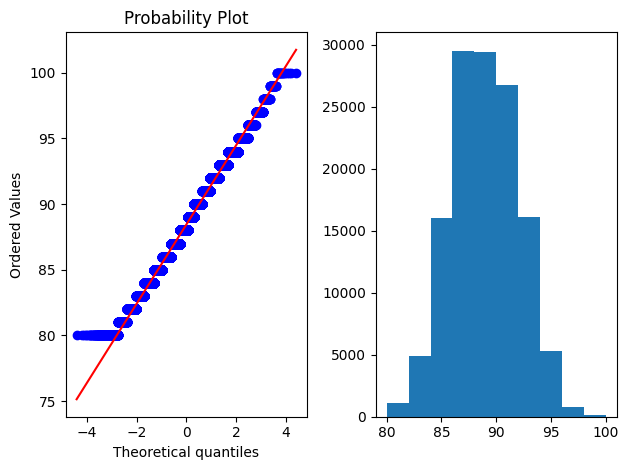

In [14]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [15]:
data.corr(method = 'spearman', numeric_only=True)

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.009378,0.003751
points,0.009378,1.000000,0.581095
price,0.003751,0.581095,1.000000


In [16]:
data.corr(method = 'kendall', numeric_only=True)

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.006536,0.002533
points,0.006536,1.000000,0.433498
price,0.002533,0.433498,1.000000


Для начала установим библиотеку scikit-learn.

In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from sklearn.metrics import matthews_corrcoef

In [19]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333